Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

In [1]:
import pandas as pd

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [2]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [3]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

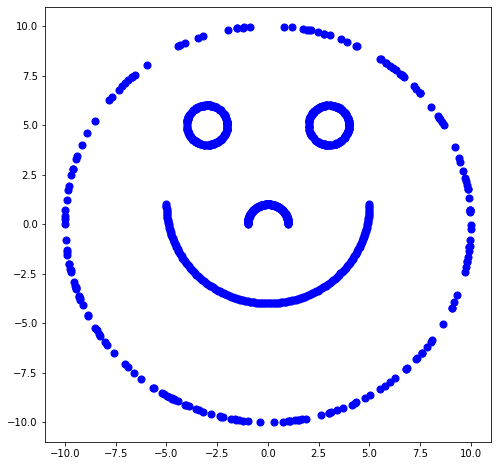

In [4]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

## A) K-Means

In [5]:
def kMeans_initializer(m,X,K):
    ''' Funtion to initialize random centroid  '''
    index = np.random.choice(m,K,replace=False)
    return [list(X[i]) for i in index]

def plot(labels, centroids):
    """ 
    Funtion to plot clusters and its centroid
    """
    df = pd.DataFrame(X,columns= ["X1","X2"])
    df["Y"] = labels 

    for i in np.unique(labels):
        x1 = df[df["Y"] == i].X1.to_list()
        x2 = df[df["Y"] == i].X2.to_list()
        plt.scatter(x1 , x2)
    plt.scatter(centroids[:,0] , centroids[:,1],color='Black')
    plt.show()

def getClusters(centroids,X,K):
    ''' This funtion assign cluster based on closest centroid to data'''
    clusters = [[] for _ in range(K)]
    for i, x in enumerate(X):
        k = getClosestCentroid(x, centroids)
        clusters[k].append(i)
    return clusters

def getClosestCentroid(x, centroids):
    '''
    This funtion find closest centroid from a point
    '''
    dist = []
    for i in centroids:
        dist.append(np.sqrt(np.sum((x - i) ** 2)))
    return np.argmin(dist)

def getCentroids(clusters,K,n):
    """
    This funtion find new centroids from mean of cluster.
    """
    centroids = np.zeros((K, n))
    for i, cluster in enumerate(clusters):
        mean = np.mean(X[cluster], axis=0)
        centroids[i] = mean
    return centroids



def K_Means(X,K,iters=100,initializer=kMeans_initializer):
    # list index of data points for each cluster
    clusters = [[] for _ in range(K)]
    # list for cluster center
    centroids = []
    
    #get number of samples and its dimention
    m = X.shape[0]
    n = X.shape[1]
    
    centroids = initializer(m,X,K)
    
    # Optimize clusters
    for _ in range(iters):
        # create clusters for new centroid
        clusters = getClusters(centroids,X,K)

        # Calculate new centroids from the clusters
        old = centroids
        centroids = getCentroids(clusters,K,n)
        
    # each sample will get the label of the cluster it was assigned to
    labels = np.empty(m)
    for i, cluster in enumerate(clusters):
        for j in cluster:
            labels[j] = i
    return labels, centroids

        

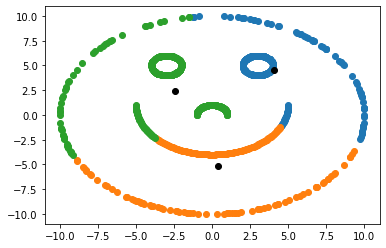

In [6]:
# Call K-Means on K=3
labels, centroids = K_Means(X,K=3,iters=100,initializer=kMeans_initializer)
plot(labels, centroids)

## B) K-Means++

In [7]:
def kMPP_initializer(m,X,K):
    ''' Funtion to initialize centroid  using Kmean++'''
    # each cluster is init far from each other
    centroids = []
    index = np.random.choice(1000,1)[0]
    centroids.append(list(X[index]))


    for _ in range(K-1):
        dist = []
        for i in range(X.shape[0]):
            x = X[i]
            d = np.Inf
    
            for j in centroids:
                temp = np.sqrt(np.sum((x - j) ** 2))
                d = min(d,temp)
    
            dist.append(d)
        centroids.append(X[np.argmax(np.array(dist))].tolist())
    
    return np.array(centroids)

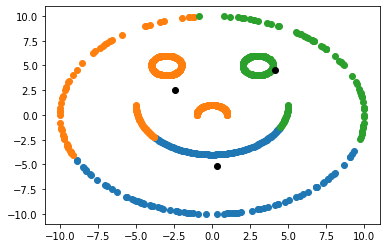

In [8]:
# Call Kmeans++ on K=3 
labels, centroids = K_Means(X,K=3,iters=100,initializer=kMPP_initializer)
plot(labels, centroids)

## C) 

In [9]:
def elbowCurve(X,i=5):
    # method to find best number of cluster
    costs = []
    for K in range(1,i+1):
        labels, centroids = K_Means(X,K,iters=100)
        df = pd.DataFrame(X,columns= ["X1","X2"])
        df["Y"] = labels 
        
        cost = 0
        for k in range(K):
            
            a = df[df["Y"] == k].iloc[:,[0,1]].values
            b = np.sum((a - centroids[k])**2)/len(a)
            cost = cost + b
        
        costs.append(cost/K)
    
    return costs

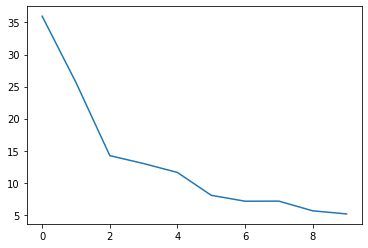

In [10]:
costs = elbowCurve(X,i=10)
plt.plot(list(range(len(costs))), costs)

K=5 gives best clustering. Because of the shape of data K-Means is not able to cluster properly.

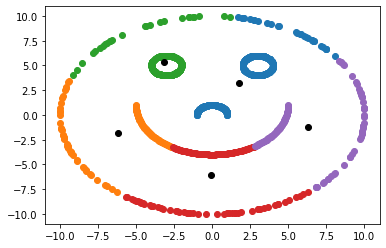

In [11]:
labels, centroids = K_Means(X,K=5,iters=100,initializer=kMPP_initializer)
plot(labels, centroids)

## D) Kernel K-Means

In [12]:
def getClusterpt(clusters,X):
    # funtion to get data divided into cluster based on index
    List = [[] for i in range(len(clusters))]
    for i in range(len(clusters)):
        for j in range(len(clusters[i])):
            List[i].append(X[clusters[i][j]])
    return List

def distanceOrigin_initializer(m,X,K):
    # funtion to div data into cluster based on its distance from centroid
    dist = np.ndarray(shape=(m, 1))
    for i in range(m):
        dist[i] = np.sqrt((X[i][0]**2)+(X[i][1]**2))
    sortedIndex = dist[:,0].argsort()

    clusters = np.array_split(sortedIndex, 5)
    for i in range(len(clusters)):
        clusters[i] = list(clusters[i])
    return clusters

In [13]:
def RbfKernel(data1, data2, sigma):
    # funtion to calculate RBF kernel
    dist = (np.square(abs(np.subtract(data1, data2))).sum(axis=1))
    return np.exp(-(dist)/(2*sigma**2))

def thirdTerm(clusterMember, sigma):
    term3 = 0
    m = clusterMember.shape[0]
    for i in range(m):
        for j in range(m):
            term3 = term3 + RbfKernel(clusterMember[i, :], clusterMember[j, :], sigma)
    return term3 / (m ** 2)

def secondTerm(d, clusterMember, sigma):
    term2 = 0
    m = clusterMember.shape[0]
    for i in range(m):
        term2 = term2 + RbfKernel(d, clusterMember[i,:], sigma)
    return 2 * term2 / m

def Kernel_K_Means(X,K,iters=100,initializer=kMeans_initializer, sigma = 2):
    # list index of data points for each cluster
    clusters = [[] for _ in range(K)]
    # list for cluster center
    centroids = []
    
    #get number of samples and its dimention
    m = X.shape[0]
    n = X.shape[1]
    
    if((initializer == kMeans_initializer) or (initializer == kMeans_initializer)):
        centroids = initializer(m,X,K)
        clusters = getClusters(centroids,X,K)
        clusterMember = getClusterpt(clusters,X)
    elif(initializer == distanceOrigin_initializer):
        clusters = distanceOrigin_initializer(m,X,K)
        clusterMember = getClusterpt(clusters,X)

    for _ in range(iters):
        kernel_result = np.ndarray(shape=(m, 0)) # (1000, 0)
              
        #assign data to cluster whose centroid is the closest one
        for i in range(K):#repeat for all cluster
            x = thirdTerm(np.asmatrix(clusterMember[i]), sigma)
            term3 = np.repeat(x, m, axis=0)
            term3 = np.asmatrix(term3)
            
            term2 = np.ndarray(shape=(0,1))
            for j in range(m): #repeat for all data
                y = secondTerm(X[j,:], np.asmatrix(clusterMember[i]) , sigma)
                term2 = np.concatenate((term2, y), axis=0)
            term2 = np.asmatrix(term2)

            z = np.add(-1*term2, term3)
            kernel_result = np.concatenate((kernel_result, z), axis=1)

       
        clusterMatrix = np.ravel(np.argmin(np.matrix(kernel_result), axis=1))     
        newClusterMember = [[] for l in range(K)]
        for i in range(0, m):#assign data to cluster regarding cluster matrix
            newClusterMember[clusterMatrix[i].item()].append(X[i,:])

        #update new cluster member
        clusterMember = newClusterMember
        

    return clusterMember

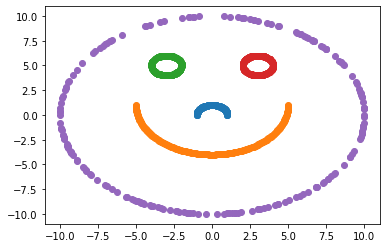

In [14]:
# call kernal kmean with sigma 2
clusterResult = Kernel_K_Means(X,5,iters=5,initializer=distanceOrigin_initializer, sigma = 2)

# plot cluster
plt.scatter(np.hsplit(np.array(clusterResult[0]), 2)[0],np.hsplit(np.array(clusterResult[0]), 2)[1])
plt.scatter(np.hsplit(np.array(clusterResult[1]), 2)[0],np.hsplit(np.array(clusterResult[1]), 2)[1])
plt.scatter(np.hsplit(np.array(clusterResult[2]), 2)[0],np.hsplit(np.array(clusterResult[2]), 2)[1])
plt.scatter(np.hsplit(np.array(clusterResult[3]), 2)[0],np.hsplit(np.array(clusterResult[3]), 2)[1])
plt.scatter(np.hsplit(np.array(clusterResult[4]), 2)[0],np.hsplit(np.array(clusterResult[4]), 2)[1])
plt.show()

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

## A) EM algorithm for a Gaussian mixture model

### E-Step

$$ \gamma_{nj} =  argmax_\gamma(L(\theta,\gamma)) $$
$$ \gamma_{nj} =  argmax_\gamma(L(\theta,\gamma)) = P(\pi_i|x_i,\theta) $$

$$ P(\pi_i|x_i,\theta) = \frac{P(x_i|\pi_i,\theta)P(\pi_{ij}|\theta)}{P(x_i|\theta)} $$

$$ \gamma_{nk} = \frac{\pi_j N(x_n|\mu_j,\Sigma_j)}{\sum_k\pi_k N(x_n|\mu_k,\Sigma_k)} $$

Now as $\Sigma = \sigma^2I$

$$ \gamma_{nk} = \frac{\pi_j N(x_n|\mu_j,\sigma^2I)}{\sum_k\pi_k N(x_n|\mu_k,\sigma^2I)} $$


### M-Step

$P(X,Z|\theta) = \prod_{i=1}^{N} P(x_i,z|\theta) $
$\\= \prod_{i=1}^{N} \sum_{j=1}^{K} P(x_i,z_{i} = j|\theta) $
$\\= \prod_{i=1}^{N} \sum_{j=1}^{K} P(z_i = j |\theta)P(x_i | z_{i} = j,\theta) $
$\\= \prod_{i=1}^{N} \sum_{j=1}^{K} \pi_j P(x_i | z_{i} = j,\theta) $

Now Maximize $\theta$ 
Subjected to condition
$\\ \sum_{j=1}^{K} \pi_j = 1$ 
And
$\\ \Sigma = \sigma^2 I $

$\\ \theta = argmax_{\theta} E_{p(Z|X,\theta)} log(P(X,Z|\theta))  $
$= \sum_{i=1}^{N} \sum_{j=1}^{K} \gamma_{ij} \; log( \pi_j \; N(x_i|\mu_i, \Sigma_j)) - \lambda \left[\sum_{j=1}^{K} \pi_j -1\right]  $



#### 1. For $\lambda $
$$
\frac{\partial \theta}{\partial \lambda} = \frac{\partial \theta}{\partial \lambda} \left[ \sum_{i=1}^{N} \sum_{j=1}^{K} \gamma_{ij} \; log( \pi_j \; N(x_i|\mu_i, \Sigma_j)) - \lambda \left[\sum_{j=1}^{K} \pi_j -1\right] \right]
$$

$$
\frac{\partial \theta}{\partial \lambda} = \frac{\partial \theta}{\partial \lambda} \left[ -\lambda \sum_{j=1}^{K} \pi_j + \lambda  \right]
$$

$$
\frac{\partial \theta}{\partial \lambda} = - \sum_{j=1}^{K} \pi_j + 1 = 0
$$

After setting it to zero we get

### $$
\sum_{j=1}^{K} \pi_j = 1
$$

#### 2. For $\pi $
$$
\frac{\partial \theta}{\partial \pi} = \frac{\partial \theta}{\partial \pi} \left[ \sum_{i=1}^{N} \sum_{j=1}^{K} \gamma_{ij} \; log( \pi_j \; N(x_i|\mu_i, \Sigma_j)) - \lambda \left[\sum_{j=1}^{K} \pi_j -1\right] \right]
$$

$$
\frac{\partial \theta}{\partial \pi} = \frac{\partial \theta}{\partial \pi} \left[ \sum_{i=1}^{N} \sum_{j=1}^{K} \gamma_{ij} \; ( log\pi_j + log(N(x_i|\mu_i, \Sigma_j)) - \lambda \left[\sum_{j=1}^{K} \pi_j -1\right] \right]
$$

$$
\frac{\partial \theta}{\partial \pi} = \frac{\partial \theta}{\partial \pi} \left[  \left( \sum_{i=1}^{N}\gamma_{ij}log\pi_j + \sum_{i=1}^{N}\gamma_{ij}log(N(x_i|\mu_i, \Sigma_j)\right) - \lambda \left[ \pi_j -1\right] \right]
$$

$$
\frac{\partial \theta}{\partial \pi} = \frac{\sum_{i=1}^{N}\gamma_{ij}}{\pi_j} - \lambda = 0
$$

After setting it to zero we get

$$
\pi_j = \frac{\sum_{i=1}^{N}\gamma_{ij}}{\lambda}
$$

Now to get rid of  $\lambda$
We know that $ \sum_{j=1}^{K} \pi_j = 1 $
Then,
$$
\sum_{j=1}^{K} \pi_j = \frac{\sum_{j=1}^{K}\sum_{i=1}^{N}\gamma_{ij}}{\lambda} = 1
$$

$$
\lambda = \sum_{j=1}^{K}\sum_{i=1}^{N}\gamma_{ij}
$$

Therefore,

### $$
\pi_j = \frac{\sum_{i=1}^{N}\gamma_{ij}}{\sum_{j=1}^{K}\sum_{i=1}^{N}\gamma_{ij}}
$$

#### 3. For $\mu $
$$
\frac{\partial \theta}{\partial \mu} = \frac{\partial \theta}{\partial \mu} \left[ \sum_{i=1}^{N} \sum_{j=1}^{K} \gamma_{ij} \; log( \pi_j \; N(x_i|\mu_i, \Sigma_j)) - \lambda \left[\sum_{j=1}^{K} \pi_j -1\right] \right]
$$

$$
\frac{\partial \theta}{\partial \mu} = \frac{\partial \theta}{\partial \mu} \left[ \sum_{i=1}^{N} \sum_{j=1}^{K} \gamma_{ij} \; ( log\pi_j + log(N(x_i|\mu_i, \Sigma_j)) - \lambda \left[\sum_{j=1}^{K} \pi_j -1\right] \right]
$$

$$
\frac{\partial \theta}{\partial \mu} = \frac{\partial \theta}{\partial \mu} \left[  \left( \sum_{i=1}^{N}\gamma_{ij}log\pi_j + \sum_{i=1}^{N}\gamma_{ij}log(N(x_i|\mu_i, \Sigma_j)\right) - \lambda \left[ \pi_j -1\right] \right]
$$

$$
\frac{\partial \theta}{\partial \mu} = \frac{\partial \theta}{\partial \mu} \left[ \sum_{i=1}^{N}\gamma_{ij} log\left(\frac{1}{(2\pi)^{N/2} |\Sigma_j|^{1/2} } exp\left(\frac{-1}{2} (x_i - \mu_j)^T \Sigma_j^{-1} (x_i - \mu_j)\right)\right)\right]
$$

$$
\frac{\partial \theta}{\partial \mu} = \frac{\partial \theta}{\partial \mu} \left[ \sum_{i=1}^{N}\gamma_{ij} log\left(\frac{1}{(2\pi)^{N/2} |\Sigma_j|^{1/2} }\right) + \sum_{i=1}^{N}\gamma_{ij} log\left(exp\left(\frac{-1}{2} (x_i - \mu_j)^T \Sigma_j^{-1} (x_i - \mu_j)\right)\right)\right]
$$

$$
\frac{\partial \theta}{\partial \mu} = \frac{\partial \theta}{\partial \mu} \left[ \sum_{i=1}^{N}\gamma_{ij} \frac{-1}{2} (x_i - \mu_j)^T \Sigma_j^{-1} (x_i - \mu_j)\right]
$$

Now $\Sigma_j$ symetric matrix.
By, 
$\\ \frac{\partial \theta}{\partial S} (X-S)^TW(X-S) = -2W(X-S) $

$$
\frac{\partial \theta}{\partial \mu} =  \sum_{i=1}^{N}\gamma_{ij} \left(\frac{-1}{2} \left(-2 \Sigma_j^{-1} (x_i - \mu_j)\right) \right)
$$

$$
\mu_j = \frac{\sum_{i=1}^{N}\gamma_{ij} \Sigma_j^{-1} x_j}{\sum_{i=1}^{N}\gamma_{ij} \Sigma_j^{-1}}
$$

### $$
\mu_j = \frac{\sum_{i=1}^{N}\gamma_{ij} x_j}{\sum_{i=1}^{N}\gamma_{ij} }
$$

#### 4. For $\Sigma $
$$
\frac{\partial \theta}{\partial \Sigma} = \frac{\partial \theta}{\partial \Sigma} \left[ \sum_{i=1}^{N} \sum_{j=1}^{K} \gamma_{ij} \; log( \pi_j \; N(x_i|\mu_i, \Sigma_j)) - \lambda \left[\sum_{j=1}^{K} \pi_j -1\right] \right]
$$

$$
\frac{\partial \theta}{\partial \Sigma} = \frac{\partial \theta}{\partial \Sigma} \left[ \sum_{i=1}^{N} \sum_{j=1}^{K} \gamma_{ij} \; ( log\pi_j + log(N(x_i|\mu_i, \Sigma_j)) - \lambda \left[\sum_{j=1}^{K} \pi_j -1\right] \right]
$$

$$
\frac{\partial \theta}{\partial \Sigma} = \frac{\partial \theta}{\partial \Sigma} \left[  \left( \sum_{i=1}^{N}\gamma_{ij}log\pi_j + \sum_{i=1}^{N}\gamma_{ij}log(N(x_i|\mu_i, \Sigma_j)\right) - \lambda \left[ \pi_j -1\right] \right]
$$

$$
\frac{\partial \theta}{\partial \Sigma} = \frac{\partial \theta}{\partial \Sigma} \left[ \sum_{i=1}^{N}\gamma_{ij} log\left(\frac{1}{(2\pi)^{N/2} |\Sigma_j|^{1/2} } exp\left(\frac{-1}{2} (x_i - \mu_j)^T \Sigma_j^{-1} (x_i - \mu_j)\right)\right)\right]
$$

$$
\frac{\partial \theta}{\partial \Sigma} = \frac{\partial \theta}{\partial \Sigma} \left[ \sum_{i=1}^{N}\gamma_{ij} log\left(\frac{1}{(2\pi)^{N/2} |\Sigma_j|^{1/2} }\right) + \sum_{i=1}^{N}\gamma_{ij} log\left(exp\left(\frac{-1}{2} (x_i - \mu_j)^T \Sigma_j^{-1} (x_i - \mu_j)\right)\right)\right]
$$

$$
\frac{\partial \theta}{\partial \Sigma} = \frac{\partial \theta}{\partial \Sigma} \left[  \sum_{i=1}^{N}\gamma_{ij}\left(log\left(\frac{1}{2\pi^{N/2}}\right)  + \frac{1}{2} log\left(\frac{1}{|\Sigma_j|}\right)- \frac{1}{2} (x_i - \mu_j)^T \Sigma_j^{-1} (x_i - \mu_j)\right)\right]
$$

Now as covariances are restricted to be spherical, i.e. $ \Sigma_j = \sigma^2I$

Then $ |\Sigma_j| = (\sigma^2)^2$ for 2 dimentional data.
After replacing $\Sigma$ we will find gradient with respect to $\sigma^2$

$$
\frac{\partial \theta}{\partial \sigma^2} = \frac{\partial \theta}{\partial \sigma^2} \left[ \sum_{i=1}^{N}\gamma_{ij} \left(log\left(\frac{1}{2\pi^{N/2}}\right)  +  \frac{N}{2} log\left(\frac{1}{|\Sigma_j|}\right)- \frac{1}{2} (x_i - \mu_j)^T \Sigma_j^{-1} (x_i - \mu_j)\right)\right]
$$

$$
\frac{\partial \theta}{\partial \sigma^2} = \frac{\partial \theta}{\partial \sigma^2} \left[ \left(\sum_{i=1}^{N}\gamma_{ij} log\left(\frac{1}{2\pi^{N/2}}\right)  - \frac{N}{2} log\left(|\Sigma_j|\right)\sum_{i=1}^{N}\gamma_{ij}- \frac{1}{2} \sum_{i=1}^{N}\gamma_{ij}(x_i - \mu_j)^T \Sigma_j^{-1} (x_i - \mu_j)\right)\right]
$$


$$
\frac{\partial \theta}{\partial \sigma^2} = \frac{\partial \theta}{\partial \sigma^2} \left[ \left(\sum_{i=1}^{N}\gamma_{ij} log\left(\frac{1}{2\pi^{N/2}}\right)  - N log\left(\sigma_j^2\right)\sum_{i=1}^{N}\gamma_{ij}- \frac{1}{2\sigma^2} \sum_{i=1}^{N}\gamma_{ij}(x_i - \mu_j)^T (x_i - \mu_j)\right)\right]
$$

$$
\frac{\partial \theta}{\partial \sigma^2} = - \frac{N\sum_{i=1}^{N}\gamma_{ij}}{\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{N}\gamma_{ij}(x_i - \mu_j)^T (x_i - \mu_j)
$$

$$
\frac{N\sum_{i=1}^{N}\gamma_{ij}}{\sigma^2} = \frac{1}{2\sigma^4} \sum_{i=1}^{1}\gamma_{ij}(x_i - \mu_j)^T (x_i - \mu_j)
$$

$$ 
\sigma^2 = \frac{\sum_{i=1}^{N}\gamma_{ij}(x_i - \mu_j)^T (x_i - \mu_j)}{2N\sum_{i=1}^{N}\gamma_{ij}}
$$

$$ 
\sigma^2 = \frac{\sum_{i=1}^{N}\gamma_{ij}(x_i - \mu_j)^T (x_i - \mu_j)}{2N\sum_{i=1}^{N}\gamma_{ij}}
$$

## B) EM algorithm implementation

In [46]:
# genrate data
mu1 = np.array( [5,5] )
mu2 = np.array( [5,-5] )
mu3 = np.array( [-5,0] )

tmp1 = genSphericalData( 2, 300, mu1, 5 )
tmp2 = genSphericalData( 2, 200, mu2, 1 )
tmp3 = genSphericalData( 2, 100, mu3, 2 )
X = np.vstack( (tmp1, tmp2, tmp3) )

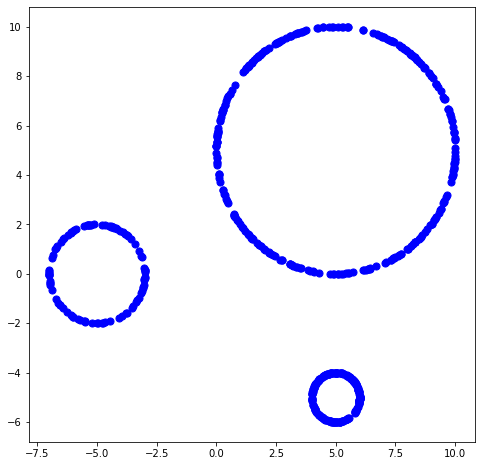

In [47]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

In [48]:
def N(x,mu,cov):
    # funtion to calculate pdf of multivariate gaussian distribution 
    x = np.asmatrix(x).T
    mu = np.asmatrix(mu).T
    cov = np.asmatrix(cov)
    
    a = np.dot((x-mu).T, np.linalg.inv(cov))
    exp = np.exp(np.dot(a , (x-mu))/-2)

    return ( 1/(2*np.pi* np.sqrt(np.linalg.det(covar[0])) ) ) * exp

In [49]:
def update_pi(z,K):
    # funtion to pi 
    Z = 0
    pi = np.zeros(K)
    for i in range(K):
        Z = Z + z[i].sum()

    for i in range(K):
        pi[i] = z[i].sum() / Z
    return pi

In [50]:
def update_mu(X,K,z):
    # funtion to mu
    mu = np.zeros([K, 2])
    for i in range(K):
        sum = 0 
        for j in range(X.shape[0]):
            sum = sum + (X[j] * z[i][j] )
            mu[i] = sum/z[i].sum()
    return mu

In [51]:
def update_covar(X,K,mu,z):
    covar = np.zeros([K,2,2])
    # funtion to covar
    for i in range(K):
        sum = 0
        sigma = 0
        meam = np.asmatrix(mu[i]).T
        for j in range(X.shape[0]):
            x = np.asmatrix(X[j]).T
            sum = sum + (((x - meam).T)*(x - meam)) * z[i][j]
        
        sigma = sum / (z[0].sum()*2*X.shape[0])
    
        covar[i] = sigma.item() * np.identity(X.shape[1])
    return covar

In [52]:
# E step
def e_step(X,K,pi,mu,covar):
    z = np.zeros([K, X.shape[0]])
    for i in range(K):
        for j in range(X.shape[0]):
            den = 0
            for k in range(K):
                den = den + pi[k] * N(X[j],mu[k],covar[k])
        
            z[i][j] = (pi[i] * N(X[j],mu[i],covar[i]) / den).item()
    return z

In [53]:
# M step
def m_step(X,K,z):
    pi = update_pi(z,K)
    mu = update_mu(X,K,z)
    covar = update_covar(X,K,mu,z)
    return pi,mu,covar

In [54]:
def em_Algo(X,K,pi,mu,covar,itter=10):
    for i in range(itter):
        z = e_step(X,K,pi,mu,covar)
        pi,mu,covar = m_step(X,K,z)
    
    return z,pi,mu,covar

In [55]:
# initialize parameters for EM algorithm
K= 3
mu = np.zeros([K, 2])
covar = np.zeros([K,2,2])
pi = np.zeros(K)
rpt = np.random.randint(X.shape[0], size=3)
for i in range(K):
    covar[i][0][0] = 1
    covar[i][1][1] = 1
    mu[i] = X[rpt[i]]
    
    pi[i] = X.shape[0]/K/X.shape[0]

In [56]:
# call em algorithm
z,pi,mu,covar = em_Algo(X,K,pi,mu,covar,itter=10)